In [2]:
import cv2
import imutils
from imutils import contours
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import img_as_ubyte, img_as_uint    
from skimage.color import rgb2gray
from keras.models import load_model
import os
import tensorflow as tf

In [25]:
img_name = "Test8.png"#input("Enter the image path")
img_name = os.path.normpath(img_name)
try :
    image = cv2.imread(img_name)
except :
    print("Enter the correct output")
image = imutils.resize(image, width=1000)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.fastNlMeansDenoising(gray, (2, 6), 1)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)


ret, thresh1 = cv2.threshold(gray, 0, 50, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

rect_kernel = np.ones((15, 15), np.uint8)
                #cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 4)

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

im2 = image.copy()
i = 0

splits = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    splits.append((x, y, w, h))

splits.sort(key = lambda x: (x[0], x[1]))

# for x, y, w, h in splits:

#     height, width = max(h, w), max(h, w)
     
#     # Drawing a rectangle on copied image
#     #rect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     cropped = im2[y:y + h, x:x + w]

#     #cv2.imwrite("recog_"+str(i)+".png", cropped)

#     split_imgs.append(cropped)

#     i += 1

In [9]:
model = load_model('trained_model6.h5')
m  = 0

C:\Users\reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


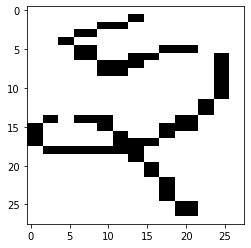

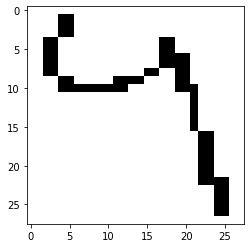

In [26]:
string = []

for x, y, w, h in splits:

    height, width = max(h, w), max(h, w)
     
    # Drawing a rectangle on copied image
    # rect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    image = im2[y:y + h, x:x + w]

    #cv2.imwrite("recog_"+str(i)+".png", cropped)
    image = imutils.resize(image, height = 28, inter=cv2.INTER_CUBIC)
    image = imutils.resize(image, height=28, inter=cv2.INTER_NEAREST_EXACT)
    #image = cv2.bitwise_not(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray= cv2.bitwise_not(gray)
    

    img_gray = rgb2gray(gray)
    im_gray_u8 = img_as_ubyte(img_gray)
    im_gray_u16 = img_as_uint(img_gray)

    (thresh, im_binary) = cv2.threshold(im_gray_u16, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    img_resized = cv2.resize(im_binary,(28,28), interpolation=cv2.INTER_NEAREST_EXACT)
    #im_gray_invert = 255 - img_resized
    img = np.zeros((28, 28))
    img_resized = cv2.normalize(img_resized, 
                        img, 0, 100, cv2.NORM_MINMAX) 
    #print(im_gray_invert)

    im_final = img_resized.reshape(1,28,28,1)

    ans = model.predict(im_final)
    # print(ans)
    ans = np.argmax(ans,axis=1)[0]
    plt.figure(figsize=(4, 4))
    plt.imshow(img_resized, interpolation = "nearest", cmap = plt.cm.gray_r)
    plt.savefig("recog_ans6_"+str(m)+".jpeg")
    m += 1
    string.append(ans)

In [27]:
print(string)

[7, 7]


In [7]:
from pydub import AudioSegment
from pydub.playback import play
import os.path

audio = {i: AudioSegment.from_wav(os.path.join(r"C:\Users\reddy\Documents\Python Scripts\dataset", str(i) + ".wav")) for i in range(10)}

C:\Users\reddy\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [8]:
import time

for i in string :
    play(audio[i])
    print("play digit "+ str(i))
    time.sleep(0.5)

print("the given digit string contains ",*(string), sep = "")

play digit 5
play digit 5
play digit 3
the given digit string contains 553
